In [1]:
import pandas as pd
import numpy as np
space=pd.read_csv('skyspace.csv')

In [2]:
space.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


##### Observevation:
        *objid = Object Identifier
        *ra = J2000 Right Ascension (r-band)
        *dec = J2000 Declination (r-band)
        *u = better of DeV/Exp magnitude fit
        *g = better of DeV/Exp magnitude fit
        *r = better of DeV/Exp magnitude fit
        *i = better of DeV/Exp magnitude fit
        *z = better of DeV/Exp magnitude fit
        *run = Run Number
        *rereun = Rerun Number
        *camcol = Camera column
        *field = Field number
        *specobjid = Object Identifier
        *redshift = Final Redshift
        *plate = plate number
        *mjd = MJD of observation
        *fiberid = fiber ID
        *Class = Galaxy,Star,Quasar



Class is our target variable. Class as 3 variables name as Galaxy,star,Quasar .Hence it is  classification problem

In [3]:
space.shape

(10000, 18)

In [4]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


### Checking for missing or null values

In [5]:
#checking for null values
space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

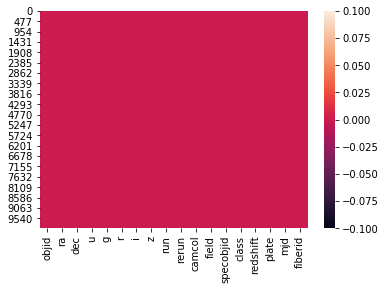

In [6]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(space.isnull())
plt.show()

##### Observed:

There are No null values

In [7]:
for column in space.columns:
    print(f"{column}: Number of unique values {space[column].nunique()}")
    print('------------------------------------------------------------')

objid: Number of unique values 1
------------------------------------------------------------
ra: Number of unique values 10000
------------------------------------------------------------
dec: Number of unique values 10000
------------------------------------------------------------
u: Number of unique values 9730
------------------------------------------------------------
g: Number of unique values 9817
------------------------------------------------------------
r: Number of unique values 9852
------------------------------------------------------------
i: Number of unique values 9890
------------------------------------------------------------
z: Number of unique values 9896
------------------------------------------------------------
run: Number of unique values 23
------------------------------------------------------------
rerun: Number of unique values 1
------------------------------------------------------------
camcol: Number of unique values 6
-----------------------------

##### Observation:
    In columns like objid,rerun only one unique value we can drop them .

In [8]:
space.isnull().values.any()

False

In [10]:
space=space1.drop(['objid','rerun'],axis=1)

##### Now our data is ready for visualization without any missing values.

In [12]:
space=pd.DataFrame(space)
space.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [13]:
space.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [14]:
space.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

##### For Analyzing the data with target i.e class we to have class from object to numeric type

In [15]:
space['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [16]:
space['class']=space['class'].map({'STAR':0,'GALAXY':1,'QSO':2})
space['class'].dtypes

dtype('int64')

In [17]:
space['class'].unique()

array([0, 1, 2], dtype=int64)

###### Observation:
    Here 0 stands for star,1 stands for Galaxy and 2 stands for QSO

### Summary Statistics

In [18]:
space.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


##### Observation:
    *There is some huge gap bewteen 75% and max value in columns like 'dec','run','field','specobjid','redshift','plate','mjd,'fiberid' that means there some outliers . 
    
    *There is some difference between mean and std in columns like 'ra','dec','u','g','r','i','z','run','rerun','field','plate','mjd','fiberid'.

### To check the correlation

In [19]:
sky=space.corr()
sky

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,0.041189,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,0.091249,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,0.284541,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,0.357352,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.278678,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.205367,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.149444,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,0.100627,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,0.010269,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,-0.002610,0.015414,-0.093723,-0.086558,-0.040493


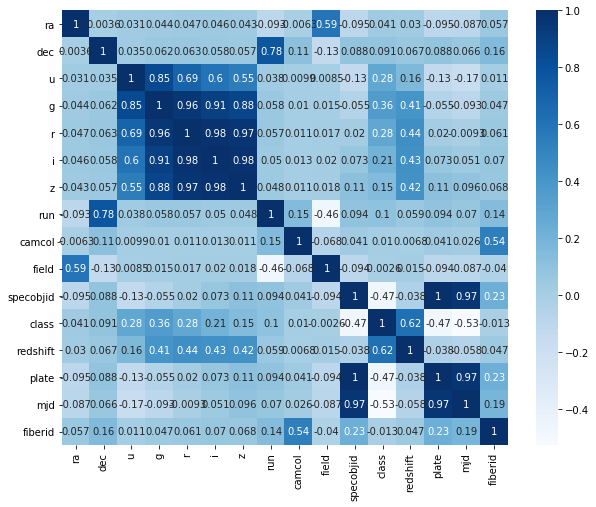

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(sky,annot=True,cmap='Blues')
plt.show()

##### Obervation:
    *u,g,r,i,z columns are correlated to each other
    * class is less correlated with plate,mjd and highly correlated with redshift

Text(0.5, 1.0, 'Correlation with target variables')

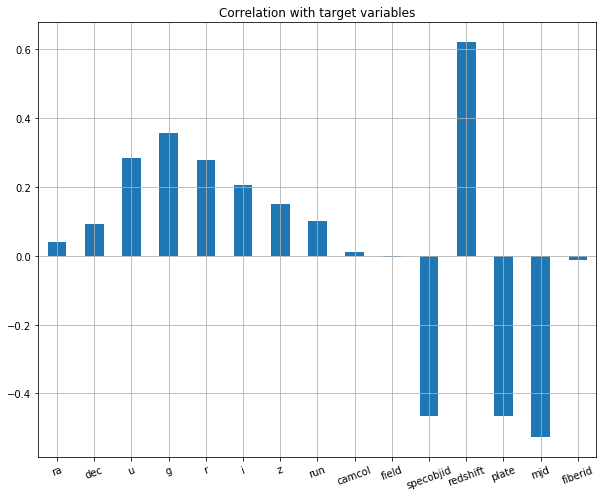

In [21]:
plt.figure(figsize=(10,8))
space.drop('class',axis=1).corrwith(space['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target variables')

### Univariate Analysis

In [22]:
space.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0,0.000590,3306,54922,512


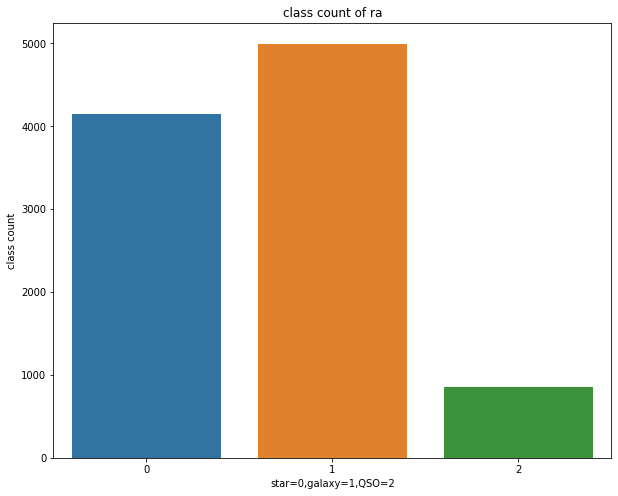

1    4998
0    4152
2     850
Name: class, dtype: int64


In [23]:
# checking class count of ra
plt.subplots(figsize=(10,8))
sns.countplot(x='class',data=space)
plt.title('class count of ra')
plt.xlabel('star=0,galaxy=1,QSO=2')
plt.ylabel('class count')
plt.show()

print(space['class'].value_counts())

##### Observation:
    Galaxy as highest number than star and QSO

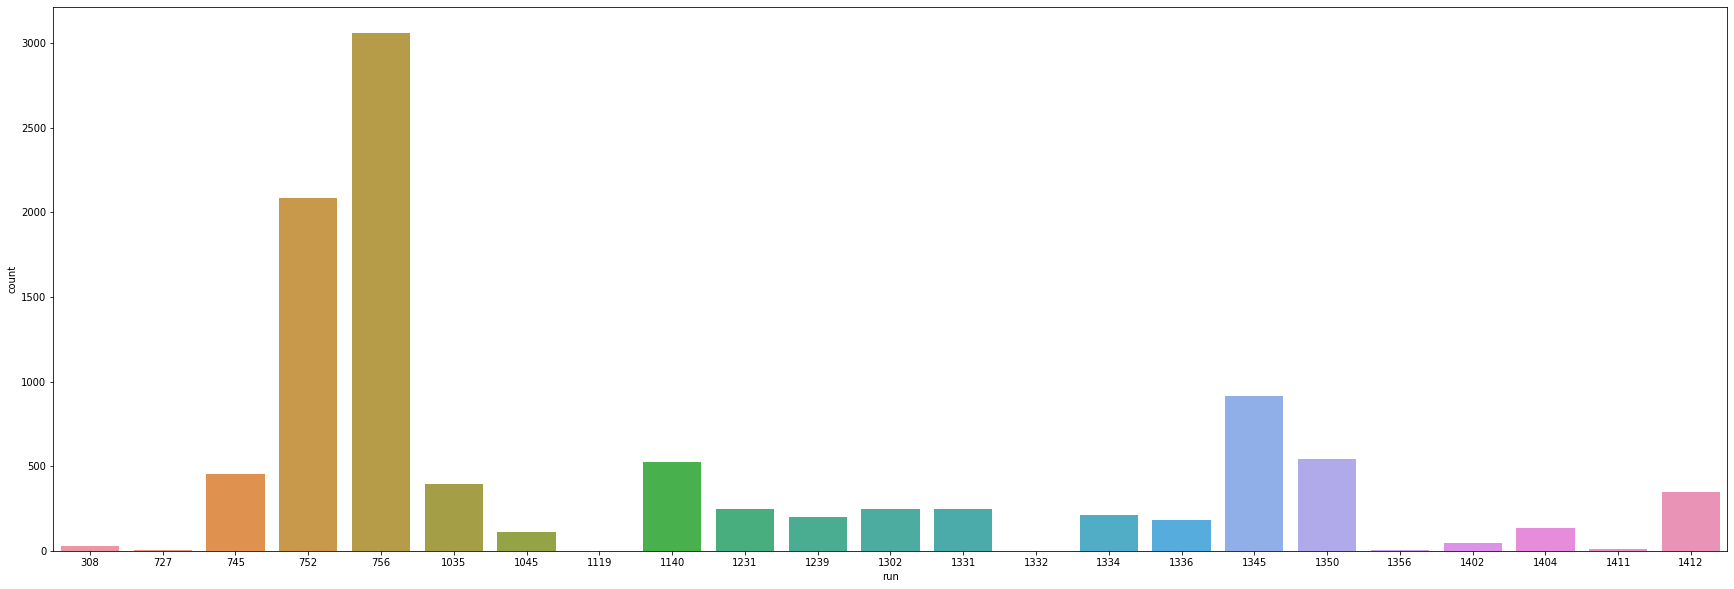

In [24]:
plt.subplots(figsize=(30,10))
sns.countplot(x='run',data=space)
plt.show()

##### Observation:
    * 756 is repeated more number of times
    * 752 is second value which is repeated more number of times
    * 1350 is third value which is repeated more number of times and 1140 is fourth value 

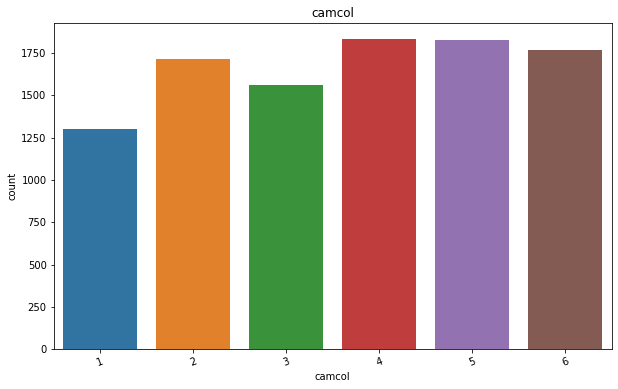

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [25]:
# camcol plotting
plt.subplots(figsize=(10,6))
sns.countplot(x='camcol',data=space)
plt.title('camcol')
plt.xticks(rotation=20)
plt.show()

print(space['camcol'].value_counts())

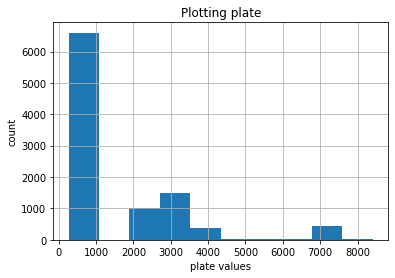

In [26]:
space['plate'].hist()
plt.xlabel('plate values')
plt.ylabel('count')
plt.title('Plotting plate')
plt.show()

#### Obervation:
    There more plate values between 400 to 1100

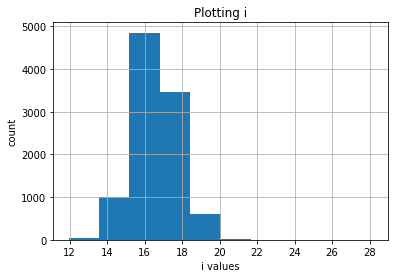

In [27]:
space['i'].hist()
plt.xlabel('i values')
plt.ylabel('count')
plt.title('Plotting i')
plt.show()

##### Observation:
    i is like normal distribution

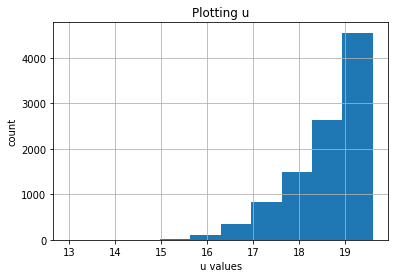

In [28]:
space['u'].hist()
plt.xlabel('u values')
plt.ylabel('count')
plt.title('Plotting u')
plt.show()

#### Observation:
    u is left skewed

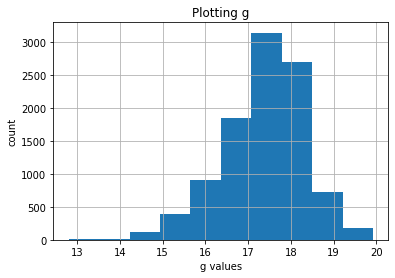

In [29]:
space['g'].hist()
plt.xlabel('g values')
plt.ylabel('count')
plt.title('Plotting g')
plt.show()

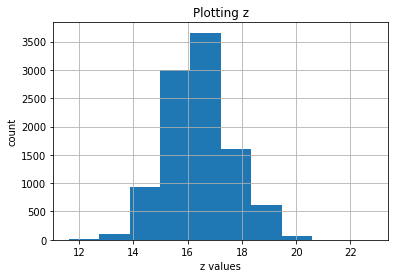

In [30]:
space['z'].hist()
plt.xlabel('z values')
plt.ylabel('count')
plt.title('Plotting z')
plt.show()

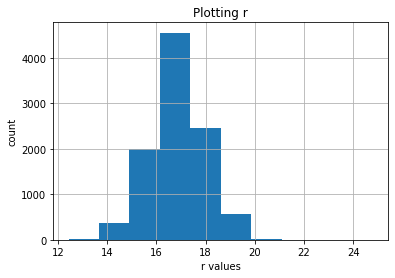

In [31]:
space['r'].hist()
plt.xlabel('r values')
plt.ylabel('count')
plt.title('Plotting r')
plt.show()

##### Observation:
    r is like normal distribution.

### Bivariate Analysis

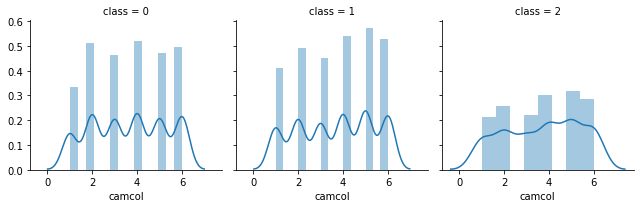

In [32]:
facet=sns.FacetGrid(space,col='class')
facet.map(sns.distplot,'camcol')
plt.show()

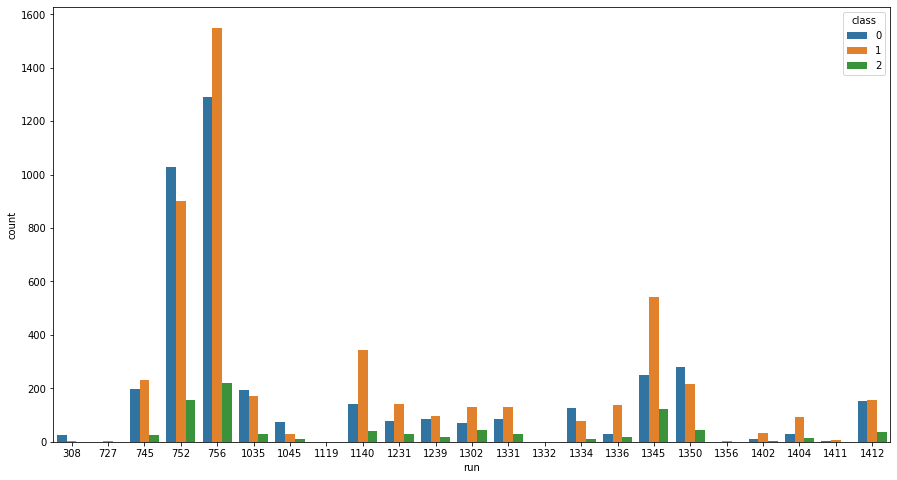

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x='run',hue='class',data=space)
plt.show()

##### Observation:
    * 756 run as more number of Galaxy,Star,QSO 
    * 752 run as sceond highest number of Galaxy,Star,QSO
    * 1345 run as thrid highest number of Gakaxy,Star,QSO

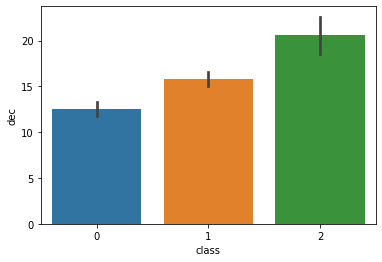

In [34]:
sns.barplot(x='class',y='dec',data=space)
plt.show()

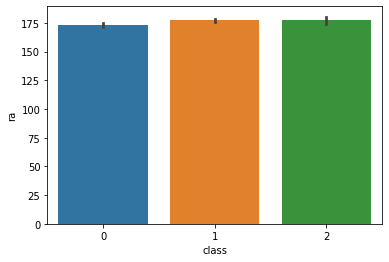

In [35]:
sns.barplot(x='class',y='ra',data=space)
plt.show()

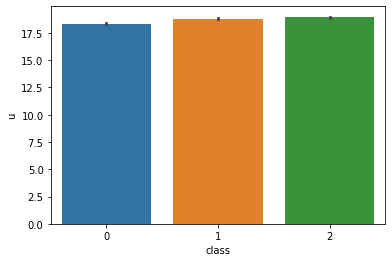

In [36]:
sns.barplot(x='class',y='u',data=space)
plt.show()

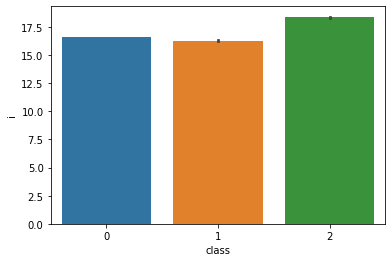

In [37]:
sns.barplot(x='class',y='i',data=space)
plt.show()

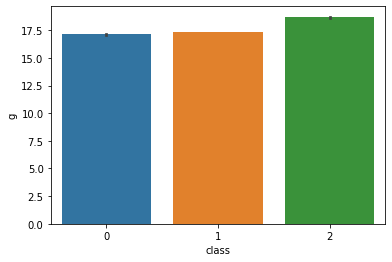

In [38]:
sns.barplot(x='class',y='g',data=space)
plt.show()

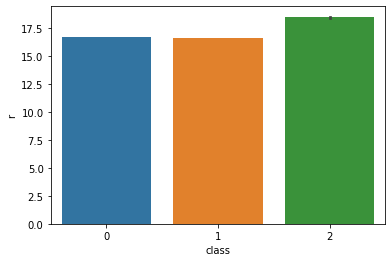

In [39]:
sns.barplot(x='class',y='r',data=space)
plt.show()

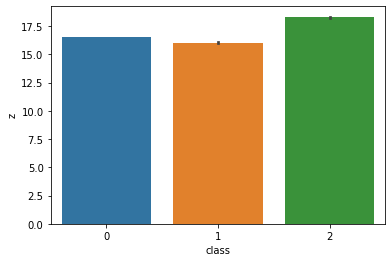

In [40]:
sns.barplot(x='class',y='z',data=space)
plt.show()

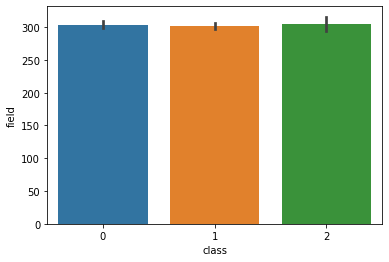

In [41]:
sns.barplot(x='class',y='field',data=space)
plt.show()

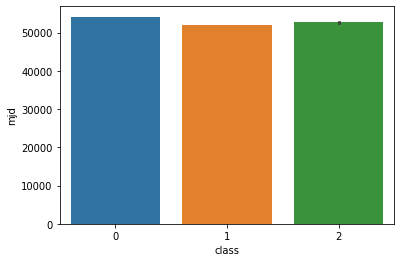

In [42]:
sns.barplot(x='class',y='mjd',data=space)
plt.show()

## Checking skewness

In [43]:
space.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

##### Observation:
    in columns like ra,u,camcol data is left skewed.
    in columns like dec,specobjid,plate,redshift,mjd data is right skewed

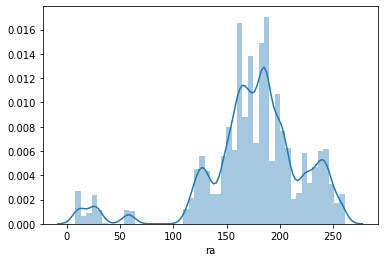

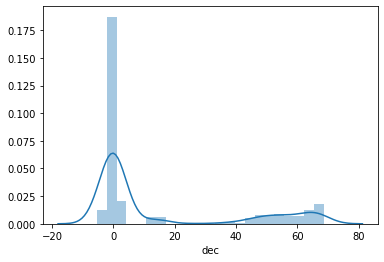

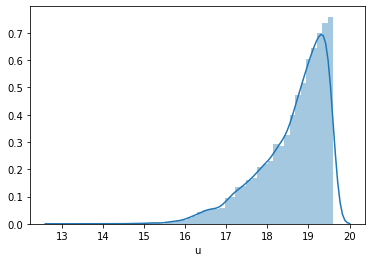

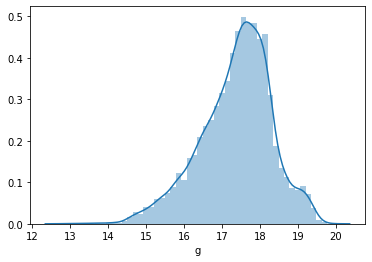

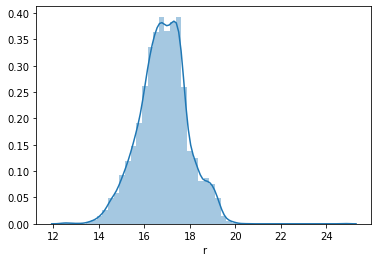

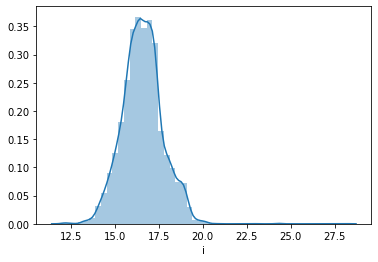

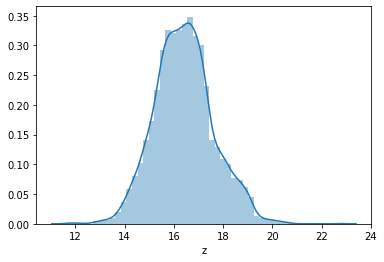

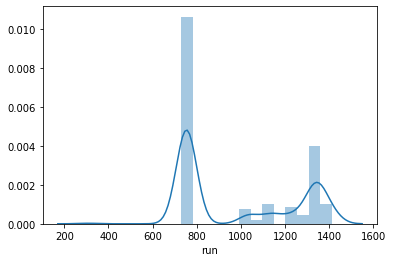

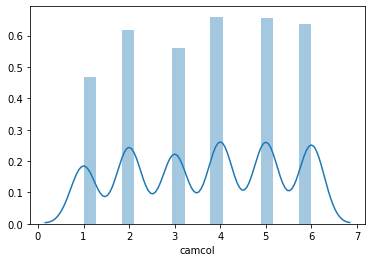

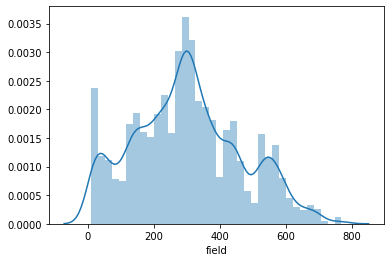

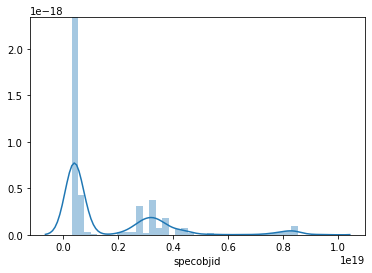

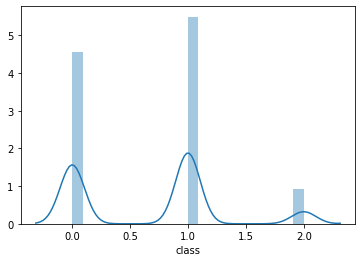

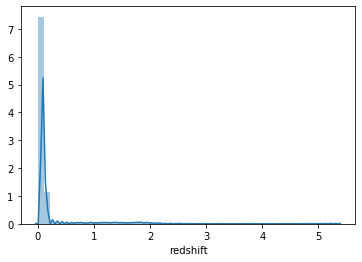

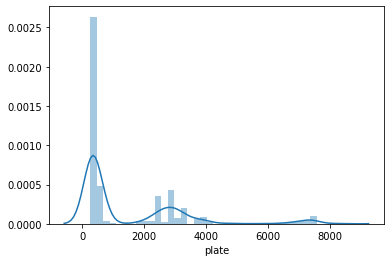

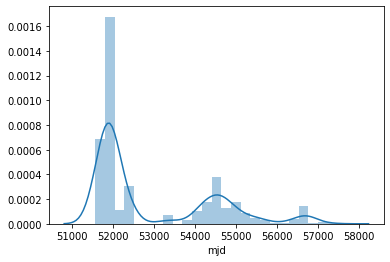

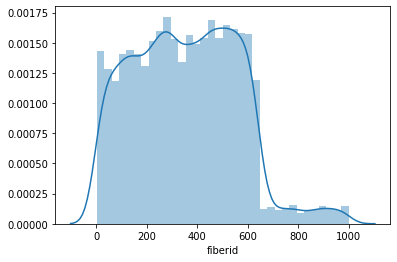

In [44]:
collist=space.columns.values
ncol=15
nrow=10
for i in space.columns:
    sns.distplot(space[i])
    plt.show()

In [45]:
#Treating skewness via log method
for col in space.columns:
    if space[col].skew()>0.55:
        space[col]=np.cbrt(space[col])

In [46]:
space.skew()

ra          -1.227350
dec          0.482193
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    0.931906
class        0.381391
redshift     1.063667
plate        0.931868
mjd          1.020451
fiberid      0.308053
dtype: float64

##### Observation:
    Skewness is reduced.

## Checking for outliers

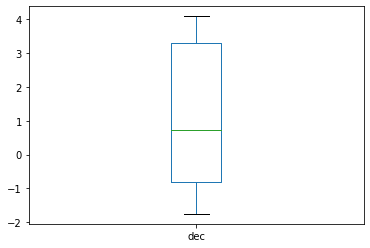

In [47]:
space['dec'].plot.box()

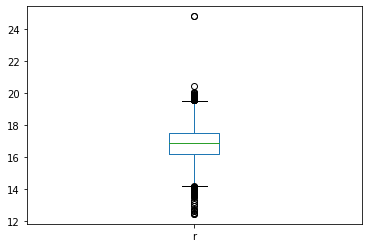

In [48]:
space['r'].plot.box()

##### Observation:
    in 'dec' there no outliers.
    in 'r' column there are some outliers 

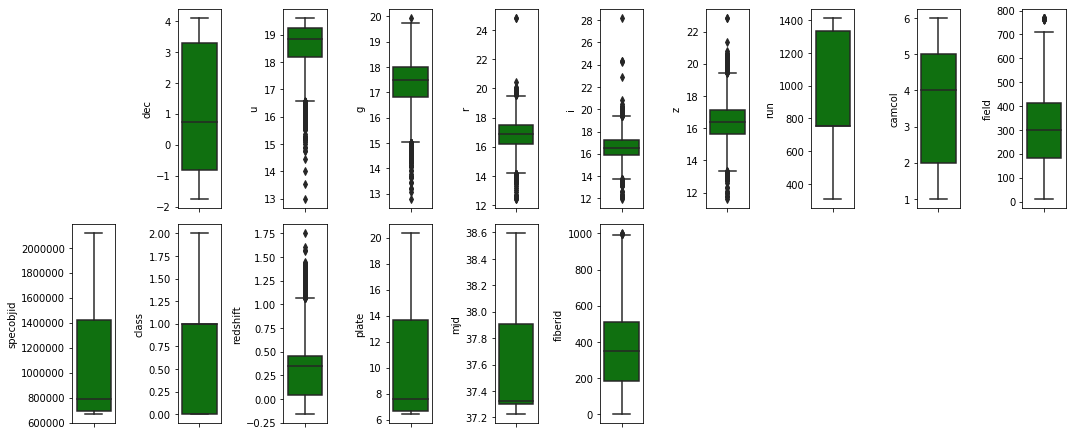

In [49]:
#let us check outliers for all columns
col=space.columns.values
ncol=10
nrow=10
plt.figure(figsize=(15,30))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(space[col[i]],color='green',orient='v')
    plt.tight_layout()

##### Obervation:
     There outliers in cloumns like u,g,r,i,z,redshift

## Removing Outliers

In [50]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(space))
print(space.shape)
spacesky=space.loc[(z_score<3).all(axis=1)]
print(spacesky.shape)

(10000, 16)
(9288, 16)


##### Obseravtion:
    712 rows are removed as outliers

## Model Training

In [51]:
spacesky.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.447630,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,1.549790e+06,0,-0.020770,14.897073,38.011539,491
1,183.598371,0.513354,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,7.138821e+05,0,-0.038006,6.861212,37.232767,541
2,183.680207,0.501575,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,6.863152e+05,1,0.497469,6.596202,37.330614,513
3,183.870529,0.368184,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,1.549791e+06,0,-0.048003,14.897073,38.011539,510
4,183.883288,0.468081,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,1.549791e+06,0,0.083889,14.897073,38.011539,512


In [52]:
#Seprating into input and output variables
df_x=spacesky.drop(['class'],axis=1)

In [53]:
y=pd.DataFrame(spacesky['class'])

In [54]:
df_x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.447630,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,1.549790e+06,-0.020770,14.897073,38.011539,491
1,183.598371,0.513354,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,7.138821e+05,-0.038006,6.861212,37.232767,541
2,183.680207,0.501575,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,6.863152e+05,0.497469,6.596202,37.330614,513
3,183.870529,0.368184,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,1.549791e+06,-0.048003,14.897073,38.011539,510
4,183.883288,0.468081,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,1.549791e+06,0.083889,14.897073,38.011539,512


In [55]:
y.head()

,class
0,0
1,0
2,1
3,0
4,0


In [56]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [57]:
x.shape

(9288, 15)

In [58]:
y.shape

(9288, 1)

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## Finding the Best Parameters

In [60]:
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'linear'}


##### Observation:
    c:1,kernel=Linear are best parameters for SVC

In [61]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


##### observation:
    criterion=entropy is best parameter for decision tree classifier

In [73]:
model=[DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 1.0
Score:
accuracy_score : 0.9833153928955867
confusion_matrix : [[782   2   0]
 [  0 925  15]
 [  1  13 120]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       0.98      0.98      0.98       940
           2       0.89      0.90      0.89       134

    accuracy                           0.98      1858
   macro avg       0.96      0.96      0.96      1858
weighted avg       0.98      0.98      0.98      1858

******************************************

##### Observation:
    * score of DecisionTreeClassifier    = 100% and accuracy score = 98%
    * score of KNeighborsClassifier      = 98%  and accuracy score = 96%         
    * Score of SVC                       = 99%  and accuracy score = 98%
    * Score of GaussianNB                = 97%  and accuracy score = 96%    
    * Score of RandomForestClassifier    = 100% and accuracy socre = 98%
    * Score of AdaBoostClassifier        = 98%  and accuracy score = 98%
    * Score of GradientBoostingClassifier= 99%  and accuracy score = 98%
    * Score of BaggingClassifier         = 99%  and accuracy score = 98%
    * Score of ExtraTreesClassifier      = 100% and accuracy score = 98%

from above observation we can observe that RandomForestClassifier,DecisionTreeClassifier,ExtraTreesClassifier gives best result and accuracy score of them are equal

In [68]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: [0.98546825 0.98600646 0.98385361 0.9811524  0.98384491]
Mean score: 0.9840651234991912
Standard deviation: 0.0016920251524932034
*******************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: [0.96824543 0.97847147 0.96770721 0.95853527 0.96930533]
Mean score: 0.9684529430143298
Standard deviation: 0.00632545524954

##### Observation:
    Amomg all RandomForest Classifier gives best result because F1 score is also more.Hence we select RandomForestClassifier as our best model

In [69]:
# RandomForestClassifier with best result
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9881593110871906
[[783   1   0]
 [  6 931   3]
 [  1  11 122]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       784
           1       0.99      0.99      0.99       940
           2       0.98      0.91      0.94       134

    accuracy                           0.99      1858
   macro avg       0.98      0.97      0.98      1858
weighted avg       0.99      0.99      0.99      1858



##### Observation:
     RandomForestClassifier gives accuracy score as 99% and f1 is also 99%

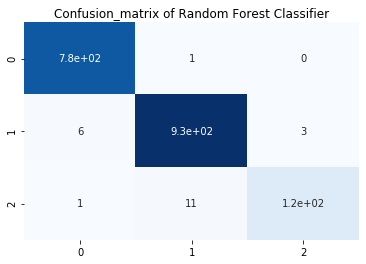

In [70]:
#plotting confusion matrix for RandomForestClassifier
cm=confusion_matrix(y_test,predrfc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title("Confusion_matrix of Random Forest Classifier")
plt.show()

## Saving the Best Model

In [74]:
import joblib
#save the best model to a pickel in a file
joblib.dump(rfc,'Spacesky.pkl')

['Spacesky.pkl']

##### Conclusion:
    RandomForestClassifier is save as pickel